# Firstly, we will explore the yerevan_april_9.csv.gz dataset

In [2]:
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm

df = pd.read_csv('yerevan_april_9.csv.gz')

df

,Unnamed: 0,price,condition,district,max_floor,street,num_rooms,region,area,url,num_bathrooms,building_type,floor,ceiling_height
0,0,65000.0,good,Center,9,Vardanants St,3,Yerevan,80.0,http://www.myrealty.am/en/item/24032/3-senyaka...,1,panel,4,2.8
1,1,140000.0,newly repaired,Arabkir,10,Hr.Kochar St,4,Yerevan,115.0,http://www.myrealty.am/en/item/17599/4-senyaka...,1,monolit,2,3.0
2,2,97000.0,newly repaired,Center,10,Teryan St,2,Yerevan,72.0,http://www.myrealty.am/en/item/29472/2-senyaka...,1,panel,3,2.8
3,3,47000.0,good,Center,9,D. Demirchyan St,1,Yerevan,43.0,http://www.myrealty.am/en/item/37186/1-senyaka...,1,panel,9,2.8
4,4,51000.0,newly repaired,Center,14,Sayat Nova Ave,1,Yerevan,33.0,http://www.myrealty.am/en/item/37184/1-senyaka...,1,other,4,2.8
5,5,44900.0,good,Center,9,Zavaryan St,3,Yerevan,71.0,http://www.myrealty.am/en/item/38221/3-senyaka...,1,panel,2,2.8
6,7,67000.0,newly repaired,Arabkir,5,Komitas Ave,2,Yerevan,60.0,http://www.myrealty.am/en/item/29648/2-senyaka...,1,stone,5,3.0
7,8,143000.0,newly repaired,Center,9,Sayat Nova Ave,4,Yerevan,98.0,http://www.myrealty.am/en/item/34641/4-senyaka...,1,panel,2,2.8
8,9,27000.0,newly repaired,Shengavit,3,Garegin Nzhdeh Ave,2,Yerevan,48.0,http://www.myrealty.am/en/item/37192/2-senyaka...,1,stone,1,2.8
9,12,34500.0,good,Avan,14,Charents disrtict,2,Yerevan,94.0,http://www.myrealty.am/en/item/31423/2-senyaka...,1,panel,13,2.8


From the summary table we can see that the mean price is about 86000, minimum and maximum prices 
are 18500 and 550000 respectively as well as some other results, which can be used for a later exploration
of the dataset and for solving different kinds of problems involving it.

From the histograms we can see that the most of the apartments have 3 rooms. I didn't really analyse the dataset, but if needed, different plots like histograms or box plot or other types of plots are useful tools for understanding your dataset in order to know how to work with it. 
Also, about 2/3 of apartments have a price larger than the mean price. 

In [3]:
df.describe() 

,Unnamed: 0,price,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height
count,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000,6234.000000
mean,3464.318255,86190.637151,8.760507,2.694899,81.607154,1.167148,5.190728,2.895797
std,1913.081569,52165.737360,4.168007,0.826298,24.809064,0.409621,3.412264,0.145520
min,0.000000,18500.000000,1.000000,1.000000,27.000000,1.000000,0.000000,2.600000
25%,1825.250000,50000.000000,5.000000,2.000000,65.000000,1.000000,3.000000,2.800000
50%,3479.500000,70000.000000,9.000000,3.000000,80.000000,1.000000,4.000000,2.800000
75%,5107.500000,107000.000000,12.000000,3.000000,97.000000,1.000000,7.000000,3.000000
max,6813.000000,550000.000000,24.000000,6.000000,149.000000,4.000000,22.000000,3.800000


In [4]:
print(df.shape)
print(df[df["price"] > 86190].shape)

(6234, 14)
(2200, 14)


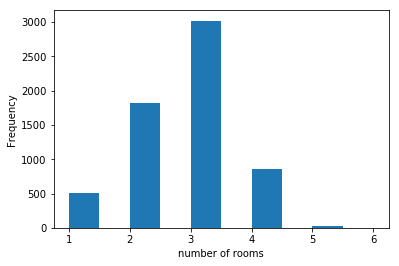

In [5]:
df["num_rooms"].plot(kind = "hist")
plt.xlabel("number of rooms")

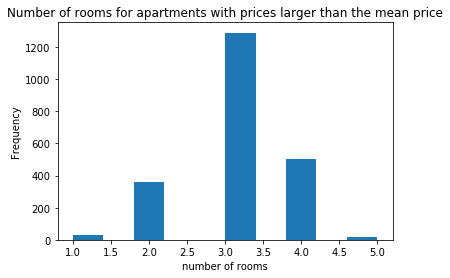

In [6]:
df[df["price"] > 86190]["num_rooms"].plot(kind = "hist")
plt.title("Number of rooms for apartments with prices larger than the mean price")
plt.xlabel('number of rooms')

# Droping unnecessary columns and turning String-type columns into one-hot vectors

In [7]:

df = df.drop(["url"],axis=1)
df = df.drop(["region"],axis=1)


df = pd.get_dummies(df, prefix=['condition', 'district', 'street', 'building_type'])
df

,Unnamed: 0,price,max_floor,num_rooms,area,num_bathrooms,floor,ceiling_height,condition_good,condition_newly repaired,...,street_Yerznkyan St,street_Z. Sarkavag 3 dead end,street_Z. Sarkavag St,street_Z.Andranik St,street_Zakyan St,street_Zavaryan St,building_type_monolit,building_type_other,building_type_panel,building_type_stone
0,0,65000.0,9,3,80.0,1,4,2.8,1,0,...,0,0,0,0,0,0,0,0,1,0
1,1,140000.0,10,4,115.0,1,2,3.0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,2,97000.0,10,2,72.0,1,3,2.8,0,1,...,0,0,0,0,0,0,0,0,1,0
3,3,47000.0,9,1,43.0,1,9,2.8,1,0,...,0,0,0,0,0,0,0,0,1,0
4,4,51000.0,14,1,33.0,1,4,2.8,0,1,...,0,0,0,0,0,0,0,1,0,0
5,5,44900.0,9,3,71.0,1,2,2.8,1,0,...,0,0,0,0,0,1,0,0,1,0
6,7,67000.0,5,2,60.0,1,5,3.0,0,1,...,0,0,0,0,0,0,0,0,0,1
7,8,143000.0,9,4,98.0,1,2,2.8,0,1,...,0,0,0,0,0,0,0,0,1,0
8,9,27000.0,3,2,48.0,1,1,2.8,0,1,...,0,0,0,0,0,0,0,0,0,1
9,12,34500.0,14,2,94.0,1,13,2.8,1,0,...,0,0,0,0,0,0,0,0,1,0


# Spliting into test and train datasets (I will predict the price)

In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size = 0.2)
#df = pd.get_dummies(df, prefix=['condition', 'district', 'street', 'building_type'])
train_y = train['price']
test_y = test['price']
train = train.drop(['price'],axis=1)
test = test.drop(['price'],axis=1)

print(train.shape)
print(test.shape)

(4987, 385)
(1247, 385)


# loss - special loss function calculating the loss score to use it instead of the default .score() of Sklearn classifiers (the less the better :)), should be < 32000

# Random Forest and Logistic regression from Sklearn

In [16]:
from sklearn.ensemble import RandomForestClassifier
import accuracy as ac

ran = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                       min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_split=1e-07,
                       bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
                       class_weight=None)



ran.fit(train,train_y)

pr1 = ran.predict(test)

print(ac.loss(test_y,pr1))


(31813.764074775136+0j)


In [25]:
from sklearn.linear_model import LogisticRegression
import cmath
log = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
    intercept_scaling=1, max_iter=200, multi_class='ovr', n_jobs=3,
    penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
    verbose=0, warm_start=False)
        

log.fit(train,train_y)
        
        
pr = log.predict(test)
        


print(ac.loss(test_y,pr))

(34277.64464800748+0j)


## Shahane's Linear Regression (again, using cross validation)

In [32]:
import linear_regression as lr


df2 = pd.read_csv('yerevan_april_9.csv.gz')

M = [featurize(df2.xs(i)) for i in range(df2.shape[0])]
X=[ind[0] for ind in M]
Y=[ind[1] for ind in M]

X=np.array(X)
Y=np.array(Y)
    
beta = lr.fit_ridge_regression(X,Y, l=1.4)
    
scores = lr.cross_validate(X, Y, fit_ridge_regression)
print(np.mean(scores))
    







(31101.3168146+0j)


# Shahane's Desicion Tree and Random Forest Classifiers

In [29]:
import runner as rn
stats = rn.evaluate_performance()
print ("Decision Tree Accuracy = ", stats[0, 0], " (", stats[0, 1], ")")
print ("Random Forest Tree Accuracy = ", stats[1, 0], " (", stats[1, 1], ")")

0


C:\Users\Shahane\ML Course\Untitled Folder\random_forest.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  rand = data[np.random.randint(data.shape[0], size=data.shape[0]*self.ratio_per_tree), :]


10
20
30
40
50
60
70
80
90
Decision Tree Accuracy =  68.8083832335  ( 16.5761428228 )
Random Forest Tree Accuracy =  77.7305389222  ( 4.82375749597 )


In [118]:
# Do not modify from HERE...
#if __name__ == "__main__":
stats = evaluate_performance()
print ("Decision Tree Accuracy = ", stats[0, 0], " (", stats[0, 1], ")")
print ("Random Forest Tree Accuracy = ", stats[1, 0], " (", stats[1, 1], ")")

0


C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:35: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


10
20
30
40
50
60
70
80
90
Decision Tree Accuracy =  69.1616766467  ( 16.4603143481 )
Random Forest Tree Accuracy =  77.8023952096  ( 5.28593980262 )


# Next, let's explore the SPECTF.dat dataset. 

In [104]:
filename = 'SPECTF.dat'
data = np.loadtxt(filename, delimiter=',')
print(data.shape)
data

(267, 45)


array([[  1.,  59.,  52., ...,  74.,  64.,  67.],
       [  1.,  72.,  62., ...,  71.,  56.,  58.],
       [  1.,  71.,  62., ...,  41.,  51.,  46.],
       ..., 
       [  0.,  75.,  73., ...,  75.,  67.,  71.],
       [  0.,  59.,  62., ...,  76.,  70.,  70.],
       [  0.,  64.,  66., ...,  64.,  57.,  54.]])

In [105]:
X = data[:, 1:]
Y = np.array([data[:, 0]]).T

# Since the dataset is small, we will use cross validation in order to get more realistic results :)

In [108]:
acc = ac.cross_validate(X,Y)
acc

(0.69056603773584901, 0.76226415094339628)

# Report tables for both datasets

In [127]:
from collections import OrderedDict

report = [{'dataset': 'SPECTF.dat', 'Training set size': 53, 'Test set size': 214, 'Classifier Type': 'Logistic Regression', 'Classifier Accuracy': '69%', 'Cross Validation': '5 folds'},
         {'dataset': 'SPECTF.dat', 'Training set size': 53, 'Test set size': 214, 'Classifier Type': 'Random Forest', 'Classifier Accuracy': '76%', 'Cross Validation': '5 folds'},
         {'dataset': 'SPECTF.dat', 'Training set size': 53, 'Test set size': 214, 'Classifier Type': "Shahane's Desicion tree", 'Classifier Accuracy': "69%", 'Cross Validation': '5 folds'},
         {'dataset': 'SPECTF.dat', 'Training set size': 53, 'Test set size': 214, 'Classifier Type': "Shahane's Random Forest", 'Classifier Accuracy': "78%", 'Cross Validation': '5 folds'}]
df_report = pd.DataFrame(report)
df_report

,Classifier Accuracy,Classifier Type,Cross Validation,Test set size,Training set size,dataset
0,69%,Logistic Regression,5 folds,214,53,SPECTF.dat
1,76%,Random Forest,5 folds,214,53,SPECTF.dat
2,69%,Shahane's Desicion tree,5 folds,214,53,SPECTF.dat
3,78%,Shahane's Random Forest,5 folds,214,53,SPECTF.dat


In [38]:
 
report1 =  [{'dataset': 'yerevan_april_9.csv.gz', 'Training set size': 4987, 'Test set size': 1247, 'Classifier Type': 'Logistic Regression', 'Loss Score': 34277, 'Cross Validation': 'No'},
         {'dataset': 'yerevan_april_9.csv.gz', 'Training set size': 4987, 'Test set size': 1247, 'Classifier Type': "Random Forest", 'Loss Score': 31813, 'Cross Validation': 'No'},
         {'dataset': 'yerevan_april_9.csv.gz', 'Training set size': 4987, 'Test set size': 1247, 'Classifier Type': "Shahane's Linear Regression", 'Loss Score': 31101, 'Cross Validation': 'No'}]
df_report1 = pd.DataFrame(report1)
df_report1

,Classifier Type,Cross Validation,Loss Score,Test set size,Training set size,dataset
0,Logistic Regression,No,34277,1247,4987,yerevan_april_9.csv.gz
1,Random Forest,No,31813,1247,4987,yerevan_april_9.csv.gz
2,Shahane's Linear Regression,No,31101,1247,4987,yerevan_april_9.csv.gz
